In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
# ticker = "ITC.NS"
# data = yf.download(ticker, period = "2y")

ticker = yf.Ticker("ITC.NS")
data = ticker.history(period="6mo")


In [ ]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-20 00:00:00+05:30,424.359478,426.486120,421.459527,423.102844,8742771,0.0,0.0
2025-01-21 00:00:00+05:30,423.392829,432.092682,420.734541,422.957825,15686500,0.0,0.0
2025-01-22 00:00:00+05:30,425.229458,427.211109,421.991174,422.426178,9619648,0.0,0.0
2025-01-23 00:00:00+05:30,420.492877,427.114437,419.622898,425.519470,8888248,0.0,0.0
2025-01-24 00:00:00+05:30,424.746130,430.159377,424.407796,426.872772,9665384,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-14 00:00:00+05:30,417.049988,419.950012,416.549988,419.399994,6896989,0.0,0.0
2025-07-15 00:00:00+05:30,420.899994,422.399994,419.000000,422.100006,8532755,0.0,0.0
2025-07-16 00:00:00+05:30,422.100006,425.450012,420.299988,424.600006,9780773,0.0,0.0


# Text Preprocessing starts


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2025-01-20 00:00:00+05:30 to 2025-07-18 00:00:00+05:30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          124 non-null    float64
 1   High          124 non-null    float64
 2   Low           124 non-null    float64
 3   Close         124 non-null    float64
 4   Volume        124 non-null    int64  
 5   Dividends     124 non-null    float64
 6   Stock Splits  124 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 7.8 KB


In [ ]:
data.dropna(inplace = True)

In [ ]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,124.000000,124.000000,124.000000,124.000000,1.240000e+02,124.000000,124.0
mean,414.724430,418.087230,411.222275,414.533842,1.751297e+07,0.115726,0.0
std,12.501802,12.370387,11.737302,11.945617,3.801189e+07,0.911587,0.0
min,383.091492,390.013972,383.091492,387.706482,0.000000e+00,0.000000,0.0
25%,404.092060,406.902783,400.483570,402.459641,9.604063e+06,0.000000,0.0
50%,417.255506,420.299988,415.174500,417.100006,1.320785e+07,0.000000,0.0
75%,422.318728,426.966801,419.719562,422.764923,1.803265e+07,0.000000,0.0
max,446.592440,455.775585,437.215920,447.124054,4.318516e+08,7.850000,0.0


In [ ]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-20 00:00:00+05:30,424.359478,426.486120,421.459527,423.102844,8742771,0.0,0.0
2025-01-21 00:00:00+05:30,423.392829,432.092682,420.734541,422.957825,15686500,0.0,0.0
2025-01-22 00:00:00+05:30,425.229458,427.211109,421.991174,422.426178,9619648,0.0,0.0
2025-01-23 00:00:00+05:30,420.492877,427.114437,419.622898,425.519470,8888248,0.0,0.0
2025-01-24 00:00:00+05:30,424.746130,430.159377,424.407796,426.872772,9665384,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-14 00:00:00+05:30,417.049988,419.950012,416.549988,419.399994,6896989,0.0,0.0
2025-07-15 00:00:00+05:30,420.899994,422.399994,419.000000,422.100006,8532755,0.0,0.0
2025-07-16 00:00:00+05:30,422.100006,425.450012,420.299988,424.600006,9780773,0.0,0.0


In [ ]:
data.reset_index(inplace = True)

In [ ]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-01-20 00:00:00+05:30,424.359478,426.486120,421.459527,423.102844,8742771,0.0,0.0
1,2025-01-21 00:00:00+05:30,423.392829,432.092682,420.734541,422.957825,15686500,0.0,0.0
2,2025-01-22 00:00:00+05:30,425.229458,427.211109,421.991174,422.426178,9619648,0.0,0.0
3,2025-01-23 00:00:00+05:30,420.492877,427.114437,419.622898,425.519470,8888248,0.0,0.0
4,2025-01-24 00:00:00+05:30,424.746130,430.159377,424.407796,426.872772,9665384,0.0,0.0
...,...,...,...,...,...,...,...,...
119,2025-07-14 00:00:00+05:30,417.049988,419.950012,416.549988,419.399994,6896989,0.0,0.0
120,2025-07-15 00:00:00+05:30,420.899994,422.399994,419.000000,422.100006,8532755,0.0,0.0
121,2025-07-16 00:00:00+05:30,422.100006,425.450012,420.299988,424.600006,9780773,0.0,0.0
122,2025-07-17 00:00:00+05:30,425.799988,425.899994,423.000000,423.950012,7240795,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                       
---  ------        --------------  -----                       
 0   Date          124 non-null    datetime64[ns, Asia/Kolkata]
 1   Open          124 non-null    float64                     
 2   High          124 non-null    float64                     
 3   Low           124 non-null    float64                     
 4   Close         124 non-null    float64                     
 5   Volume        124 non-null    int64                       
 6   Dividends     124 non-null    float64                     
 7   Stock Splits  124 non-null    float64                     
dtypes: datetime64[ns, Asia/Kolkata](1), float64(6), int64(1)
memory usage: 7.9 KB


In [ ]:
data['Date'] = data['Date'].astype(str)
data.Date = data.Date.str.split(" ").str[0]

In [ ]:
data['Year']= data.Date.str.split("-").str[0]
data['Month'] = data.Date.str.split("-").str[1]

In [ ]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month
0,2025-01-20,424.359478,426.486120,421.459527,423.102844,8742771,0.0,0.0,2025,01
1,2025-01-21,423.392829,432.092682,420.734541,422.957825,15686500,0.0,0.0,2025,01
2,2025-01-22,425.229458,427.211109,421.991174,422.426178,9619648,0.0,0.0,2025,01
3,2025-01-23,420.492877,427.114437,419.622898,425.519470,8888248,0.0,0.0,2025,01
4,2025-01-24,424.746130,430.159377,424.407796,426.872772,9665384,0.0,0.0,2025,01
...,...,...,...,...,...,...,...,...,...,...
119,2025-07-14,417.049988,419.950012,416.549988,419.399994,6896989,0.0,0.0,2025,07
120,2025-07-15,420.899994,422.399994,419.000000,422.100006,8532755,0.0,0.0,2025,07
121,2025-07-16,422.100006,425.450012,420.299988,424.600006,9780773,0.0,0.0,2025,07
122,2025-07-17,425.799988,425.899994,423.000000,423.950012,7240795,0.0,0.0,2025,07


Yearly analysis

In [ ]:
yearly_data = data.groupby('Year').agg({'Open': 'mean', 'High': 'max', 'Low': 'min', 'Close': 'mean', 'Volume': 'sum', 'Dividends': 'sum', 'Stock Splits': 'sum'})
yearly_data.reset_index(inplace=True)
yearly_data

,Year,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025,414.72443,455.775585,383.091492,414.533842,2171607685,14.35,0.0


MOnthly analysis


In [ ]:
monthly_data = data.groupby(['Year' , 'Month']).agg({'Open': 'mean', 'High': 'max', 'Low': 'min', 'Close': 'mean', 'Volume': 'sum', 'Dividends': 'sum', 'Stock Splits': 'sum'})
monthly_data.reset_index(inplace = True)
monthly_data

,Year,Month,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025,01,423.155998,433.252686,415.756275,424.035657,135097212,0.00,0.0
1,2025,02,411.360237,455.775585,385.104429,409.410481,312457108,6.50,0.0
2,2025,03,398.479044,408.719315,384.122534,398.876977,252349326,0.00,0.0
3,2025,04,412.075884,429.535776,383.091492,412.871744,327612528,0.00,0.0
4,2025,05,424.298622,436.163661,413.000000,424.126404,732178857,7.85,0.0
5,2025,06,419.035713,428.549988,411.750000,418.597617,282245544,0.00,0.0
6,2025,07,418.321426,425.899994,411.250000,418.085717,129667110,0.00,0.0


In [ ]:
px.bar(monthly_data, x = 'Month', y = 'High' , color = 'Year')

In [ ]:
import seaborn as sns

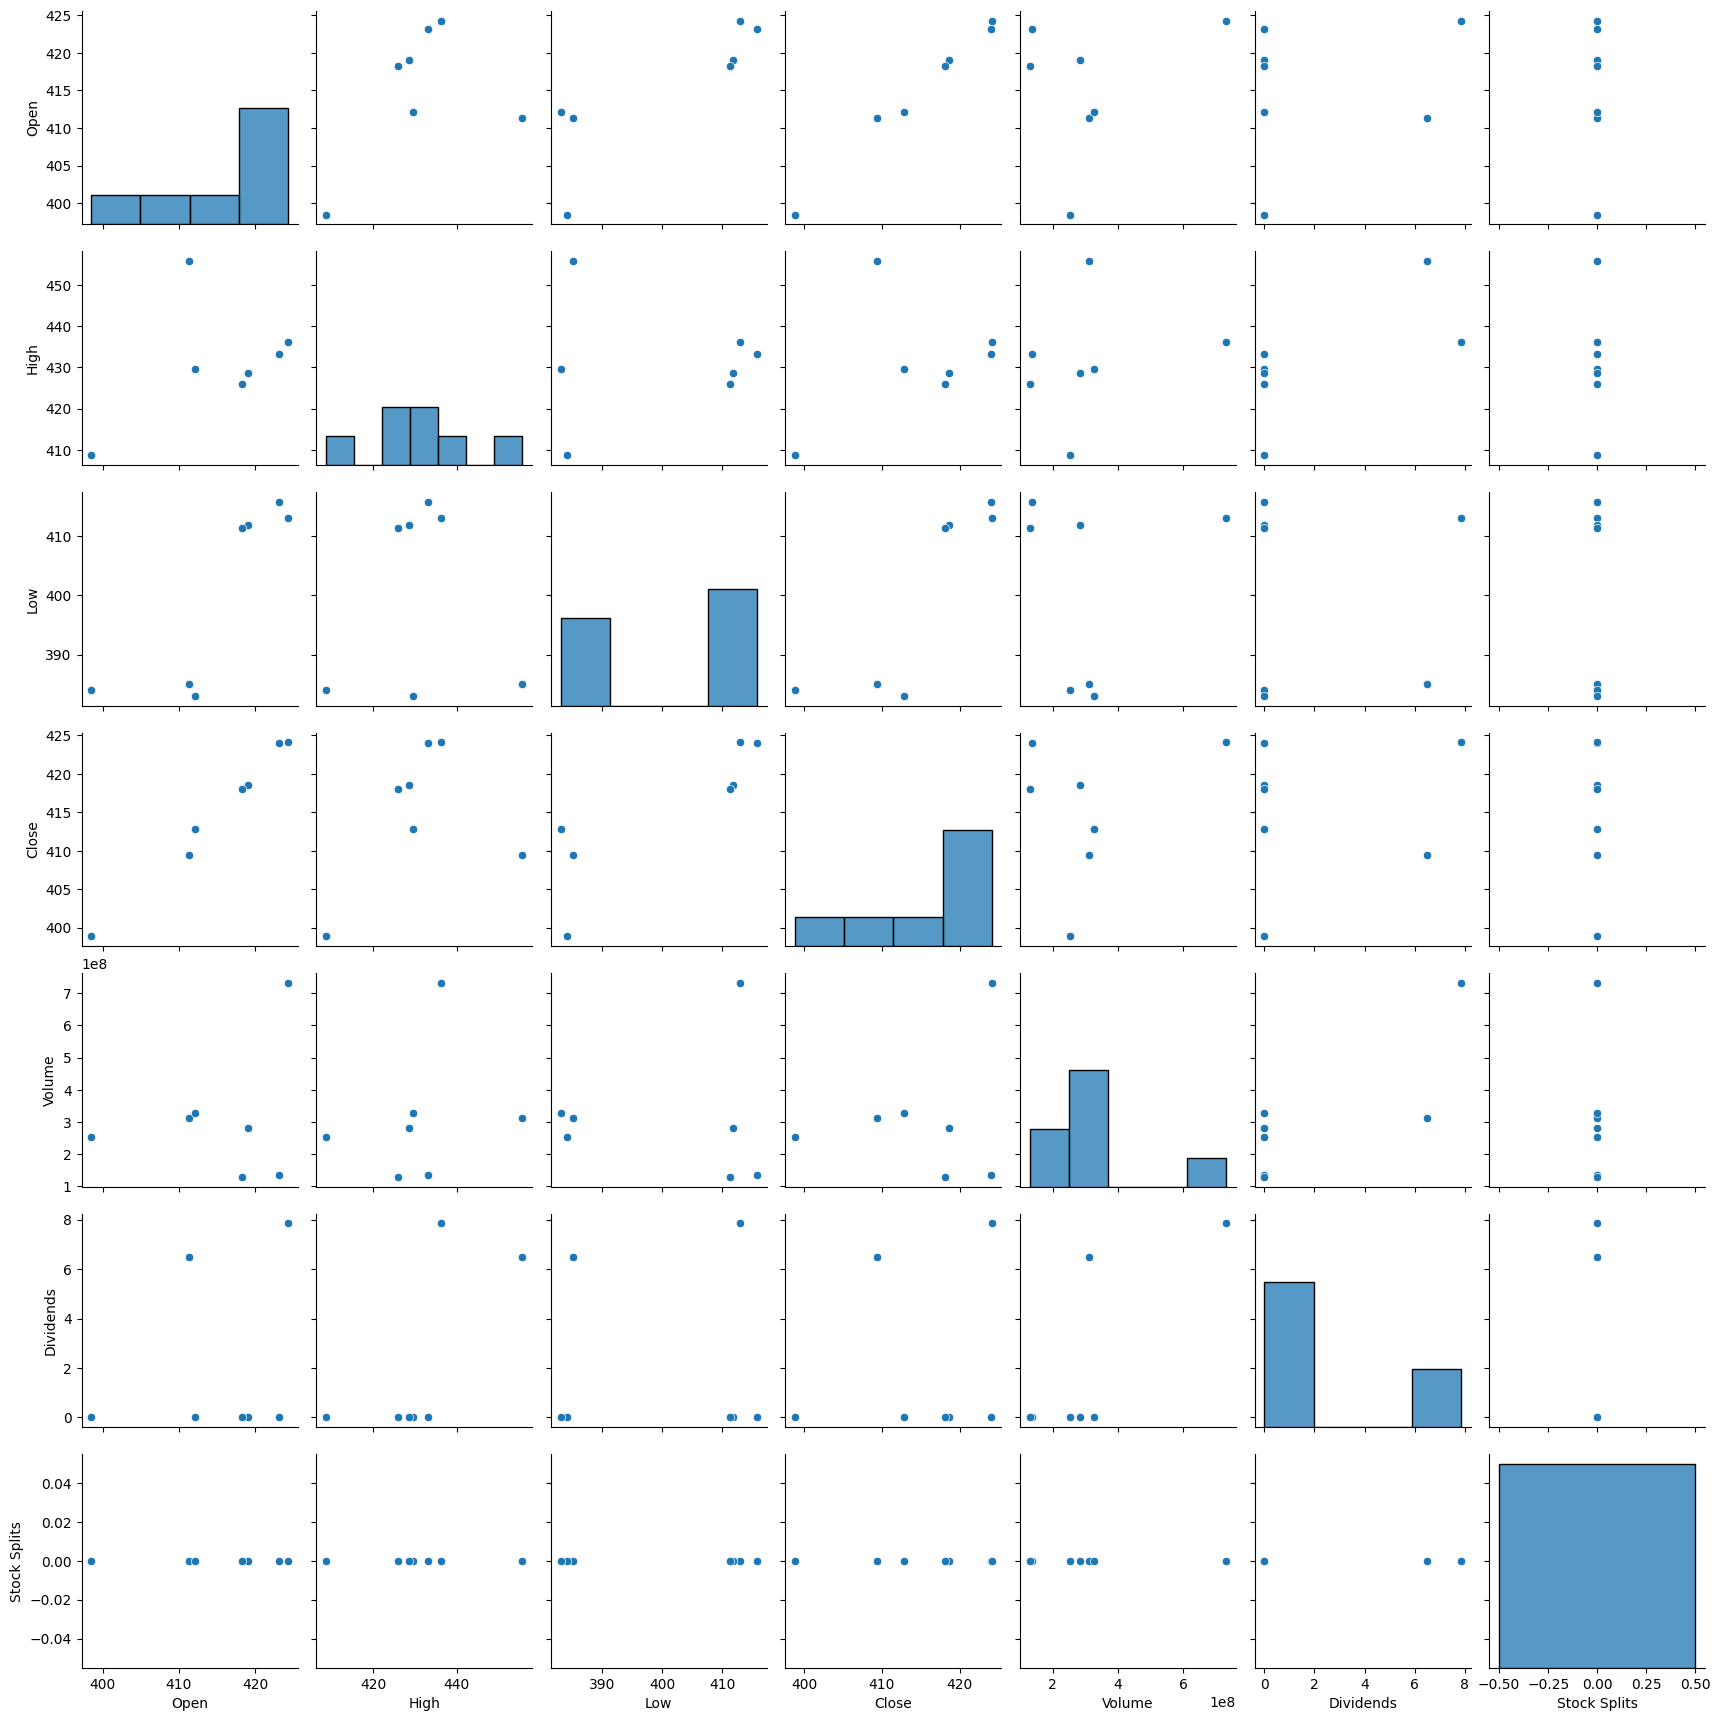

In [ ]:
sns.pairplot(monthly_data)

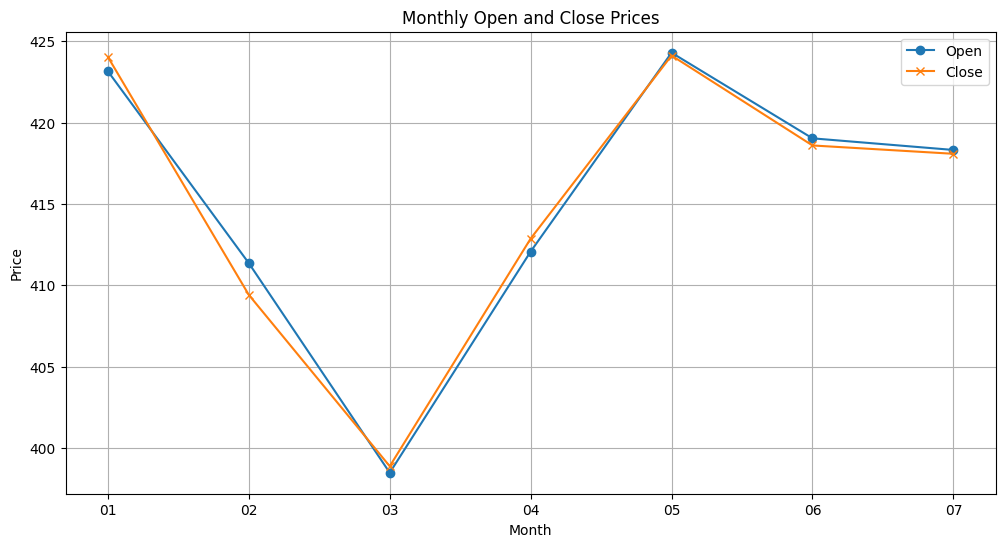

In [ ]:
# prompt: plot monthly data open and close using suitable line

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month'], monthly_data['Open'], label='Open', marker='o')
plt.plot(monthly_data['Month'], monthly_data['Close'], label='Close', marker='x')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Monthly Open and Close Prices')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
monthly_data

,Year,Month,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025,01,423.155998,433.252686,415.756275,424.035657,135097212,0.00,0.0
1,2025,02,411.360237,455.775585,385.104429,409.410481,312457108,6.50,0.0
2,2025,03,398.479044,408.719315,384.122534,398.876977,252349326,0.00,0.0
3,2025,04,412.075884,429.535776,383.091492,412.871744,327612528,0.00,0.0
4,2025,05,424.298622,436.163661,413.000000,424.126404,732178857,7.85,0.0
5,2025,06,419.035713,428.549988,411.750000,418.597617,282245544,0.00,0.0
6,2025,07,418.321426,425.899994,411.250000,418.085717,129667110,0.00,0.0


In [ ]:
fig = px.pie(monthly_data, values = 'Volume', names = 'Month')

fig.show()

In [ ]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month
0,2025-01-20,424.359478,426.486120,421.459527,423.102844,8742771,0.0,0.0,2025,01
1,2025-01-21,423.392829,432.092682,420.734541,422.957825,15686500,0.0,0.0,2025,01
2,2025-01-22,425.229458,427.211109,421.991174,422.426178,9619648,0.0,0.0,2025,01
3,2025-01-23,420.492877,427.114437,419.622898,425.519470,8888248,0.0,0.0,2025,01
4,2025-01-24,424.746130,430.159377,424.407796,426.872772,9665384,0.0,0.0,2025,01
...,...,...,...,...,...,...,...,...,...,...
119,2025-07-14,417.049988,419.950012,416.549988,419.399994,6896989,0.0,0.0,2025,07
120,2025-07-15,420.899994,422.399994,419.000000,422.100006,8532755,0.0,0.0,2025,07
121,2025-07-16,422.100006,425.450012,420.299988,424.600006,9780773,0.0,0.0,2025,07
122,2025-07-17,425.799988,425.899994,423.000000,423.950012,7240795,0.0,0.0,2025,07


In [ ]:

# info = ticker.info
# info

In [ ]:

hist = data.copy()

fig = go.Figure()
fig.add_trace(go.Scatter(x=hist.index, y=hist['Open'], name='Close Price'))
fig.add_trace(go.Bar(x=hist.index, y=hist['Volume'], name='Volume', marker_color='rgba(0,0,255,0.2)', yaxis='y2'))

fig.update_layout(
    title='Price and Volume',
    yaxis=dict(title='Price'),
    yaxis2=dict(title='Volume', overlaying='y', side='right', showgrid=False),
    legend=dict(x=0, y=1)
)
# st.plotly_chart(fig, use_container_width=True)


In [ ]:
fig = go.Figure(data=[go.Pie(labels=['Positive', 'Negative'], values=[60, 40], hole=.2)])
fig.update_layout(title='Sentiment Distribution')


In [ ]:
ma_100 = data.Close.rolling(50).mean()


/tmp/ipython-input-27-2483876442.py:3: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



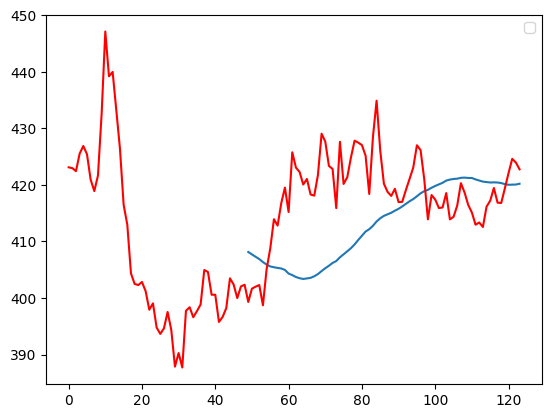

In [ ]:
plt.plot(ma_100)
plt.plot(data.Close , color = 'red', linestyle = '-')
plt.legend()

In [ ]:
X = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
Y = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [ ]:
X.shape , Y.shape

((99, 1), (25, 1))

In [ ]:
Y

,Close
99,418.200012
100,417.399994
101,415.899994
102,416.000000
103,418.549988
104,413.899994
105,414.350006
106,416.350006
107,420.299988
108,418.649994


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

In [ ]:
X_scaled = scaler.fit_transform(X)


In [ ]:
X_scaled

array([[0.59572213],
       [0.59328144],
       [0.58433381],
       [0.63639403],
       [0.65917016],
       [0.63476691],
       [0.55911751],
       [0.52495256],
       [0.57131939],
       [0.75515602],
       [1.        ],
       [0.86659699],
       [0.8796114 ],
       [0.76573027],
       [0.65103608],
       [0.48428065],
       [0.42489991],
       [0.28010755],
       [0.24870942],
       [0.24540484],
       [0.25449321],
       [0.22722657],
       [0.17186588],
       [0.19087003],
       [0.11898387],
       [0.0999792 ],
       [0.11650518],
       [0.16525569],
       [0.11154728],
       [0.00247869],
       [0.04296673],
       [0.        ],
       [0.16856027],
       [0.17930246],
       [0.14955611],
       [0.16773438],
       [0.18756494],
       [0.29002334],
       [0.28423905],
       [0.21648489],
       [0.21648489],
       [0.13550934],
       [0.15038251],
       [0.17682326],
       [0.26523489],
       [0.24705662],
       [0.20656961],
       [0.241

In [ ]:
x = []
y = []

for i in range(100 , X_scaled.shape[0]):
    x.append(X_scaled[i-100: i])
    y.append(X_scaled[i, 0])

In [ ]:
x , y = np.array(x) , np.array(y)

In [ ]:

# Calculate moving averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Plot the closing price and moving averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['SMA_50'], label='50-Day SMA', color='blue', linewidth=1.5)
plt.plot(data['SMA_200'], label='200-Day SMA', color='red', linewidth=1.5)
plt.title(f'{ticker} Stock Price with 50 & 200 Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Create interactive plot using Plotly
fig = go.Figure()

# Add close price trace
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Close Price', line=dict(color='gray')))

# Add 50-day SMA trace
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_50'], mode='lines', name='50-Day SMA', line=dict(color='blue')))

# Add 200-day SMA trace
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_200'], mode='lines', name='200-Day SMA', line=dict(color='red')))

# Update layout
fig.update_layout(
    title='Simulated Stock Price with 50 & 200 Day Moving Averages (Interactive)',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    legend=dict(x=0, y=1),
    hovermode='x unified',
    template='plotly_white',
    height=600,
    width=1000
)

fig.show()


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense